# ANLY-590 Assignment 1

### Qiaowei Jiang

## 1
Regularization. Using the accompanying Hitters dataset, we will explore
regression models to predict a player’s Salary from other variables. You must
python.
https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad

## 1.1 
Use LASSO regression to predict Salary from the other numeric predictors.
Create a visualization of the coefficient trajectories. Comment on which are the
final three predictors that remain in the model. Use cross-validation to find the
optimal value of the regularization penality. How many predictors are left in
that model?


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
!pip install pandas

In [3]:
import pandas as pd

In [24]:
df=pd.read_csv('https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv')
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [25]:
# Drop the first column and missing values
df = df.dropna().drop('Unnamed: 0', axis = 1)

In [26]:
df=df.select_dtypes([np.number])

In [28]:
y = df.Salary

In [32]:
X = df.drop(['Salary'],axis = 1)

In [49]:
# Create an array of alphas
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

The last three predictors are Hits,CRuns,CRBI.


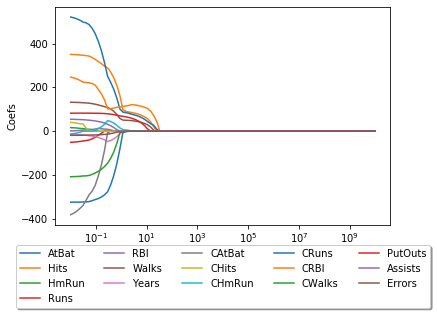

In [50]:
lasso = Lasso(max_iter = 100000, normalize = True)
coefs = []
legend=X.columns.tolist()

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefs')
plt.legend(legend,loc='upper center',bbox_to_anchor=(0.5, -0.07),shadow=True, ncol=5)

for a in coefs:
    if (a>0).sum() == 3:
        #print(a)
        break
print("The last three predictors are "+legend[1]+","+legend[10]+","+legend[11]+".")

In [51]:
# When alpha=10, there are only three predictors that remain in the model.
lasso.set_params(alpha=10)
lasso.fit(scale(X), y)
coefs.append(lasso.coef_)
pd.Series(lasso.coef_, index=X.columns)

AtBat       0.000000
Hits       14.839356
HmRun       0.000000
Runs        0.000000
RBI         0.000000
Walks       0.000000
Years       0.000000
CAtBat      0.000000
CHits       0.000000
CHmRun      0.000000
CRuns      25.229625
CRBI       65.994753
CWalks      0.000000
PutOuts     0.000000
Assists     0.000000
Errors      0.000000
dtype: float64

And the final three predictors remain in the model are: Hits, CRuns and CRBI.

In [52]:
# Use 10-fold cross-validation to find the optimal value of the regularization penality
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X, y)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [55]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X, y)

Lasso(alpha=0.0635481759985745, copy_X=True, fit_intercept=True,
      max_iter=100000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

 The results show that, the optimal value of the regularization penality in this case is alpha=0.06

In [56]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

AtBat     -2.082954
Hits       7.041011
HmRun      0.000000
Runs      -0.682615
RBI        0.496552
Walks      5.511781
Years     -6.107625
CAtBat    -0.087066
CHits      0.000000
CHmRun     0.156468
CRuns      1.228061
CRBI       0.583821
CWalks    -0.690601
PutOuts    0.292694
Assists    0.304372
Errors    -2.450795
dtype: float64

So there are 14 predictors left in that model.

## 1.2
Repeat with Ridge Regression. Visualize coeffecient trajectories. Use crossvalidation to find the optimal vaule of the regularization penalty.


In [57]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 16)

Text(0, 0.5, 'weights')

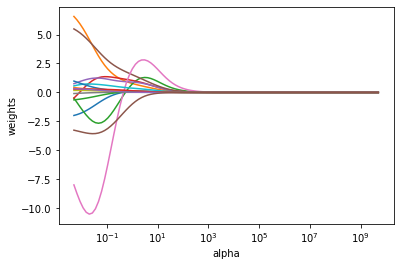

In [59]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [63]:
# Use cross-validation to find the optimal vaule of the regularization penalty
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True,cv=10)
ridgecv.fit(X, y)
ridgecv.alpha_

d:\anaconda3\envs\my_env\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.006609705742330144

So value of alpha that results in the smallest cross-validation error is 0.0066.

In [65]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X, y)
mean_squared_error(y, ridge4.predict(X))

96734.07406088346

In [66]:
# The coefficients when alpha=0.0066
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

AtBat     -1.912194
Hits       6.258570
HmRun     -0.869362
Runs      -0.223627
RBI        0.853970
Walks      5.322139
Years     -8.731175
CAtBat    -0.080058
CHits      0.177961
CHmRun     0.627760
CRuns      0.889981
CRBI       0.390423
CWalks    -0.610289
PutOuts    0.291463
Assists    0.320083
Errors    -3.318367
dtype: float64

## 2
Short Answer. Explain in your own words the bias-variance tradeoff. What
role does regularization play in this tradeoff? Make reference to your findings
in number (1) to describe models of high/low bias and variance.

Answer: 
Bias is the difference between the average prediction of our model and the true value. Variance is the amount that the estimate of the target function will change given different training data.

If the model is too simple and has very few parameters then it may have high bias and low variance. On the other hand, if the model is complex, having large number of parameters then it’s going to have high variance and low bias.

Regularization tends to reduce prediction error and regularizing the coefficients can also help to control variance.

Looking back to my findings in (1), when applying the optimal value of the regularization penality in 1.1 and 1.2, the Lasso model has three parameters while the Ridge model keeps all parameters so the Ridge one has higher variance. And the MSE of Lasso is higher than the Ridge, showing the Lasso has higher bias.  




